$\delta_r \cdot \frac{\lambda}{2\pi} + 2\cdot d \cdot\cos\theta = N\lambda$

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os
import sys
from jax import grad
from jax import numpy as jnp

dir_path = os.path.abspath('')
sys.path.append(dir_path + '/../')

from giopy import Interpolazione, final_val

sys.path.append(dir_path)

dir_path = os.path.abspath('')
FILE = dir_path + '/data/' + 'coseno_legge2.csv'
fr = pd.read_csv(FILE)
fr

,N,raggio interferenza 1 (cm),raggio interferenza 2 (cm),raggio interferenza 3 (cm),sigma raggio (mm),raggio (cm),sigmaraggio (cm),distanza (cm),spessore lente (mm),valore focale lente
0,0,1.4,1.5,1.1,1.0,1.3333,0.3122,177.5,6.65,18mm
1,1,2.6,2.1,2.6,NaN,2.4333,0.4330,177.6,NaN,NaN
2,2,3.5,3.4,3.4,NaN,3.4333,0.0866,177.5,NaN,NaN
3,3,4.1,4.0,4.1,NaN,4.0667,0.0866,177.4,NaN,NaN
4,4,4.7,4.6,4.6,NaN,4.6333,0.0866,177.3,NaN,NaN
5,5,5.2,5.0,5.1,NaN,5.1000,0.1500,NaN,NaN,NaN
6,6,5.6,5.4,5.6,NaN,5.5333,0.1732,NaN,NaN,NaN
7,7,6.1,5.8,6.0,NaN,5.9667,0.2291,NaN,NaN,NaN
8,8,6.4,6.2,6.4,NaN,6.3333,0.1732,NaN,NaN,NaN


In [2]:
r = np.array(fr['raggio (cm)'])
sigmar = np.array(fr['sigmaraggio (cm)'])

N = np.array(fr['N'])
λ = 632.8


In [3]:
def cos_teta(N,d,δr):
    A = (δr*λ)/(2*np.pi)
    return (N*λ - A)/(2*d)

def raggio_f(N,d,δr,L):
    return L * jnp.sqrt(1-cos_teta(N,d,δr)**2)/cos_teta(N,d,δr)
    

# def sigma_raggio_f(N,d,δr,L,sigmad,sigmaδr,sigmaL):
    drdd = grad(raggio_f,1)(N,d,δr,L)
    drdδr = grad(raggio_f,2)(N,d,δr,L)
    drdL = grad(raggio_f,3)(N,d,δr,L)
    return np.sqrt((drdd*sigmad)**2 + (drdδr*sigmaδr)**2 + (drdL*sigmaL)**2) 

----------------- VALORI FIT: -----------------
d: 1.0 ± nan 
δr: 1.0 ± nan 
L: 1.0 ± nan 

dof: 6
chi2: nan
chi2 ridotto: nan
pvalue: nan
------------------------------------------------



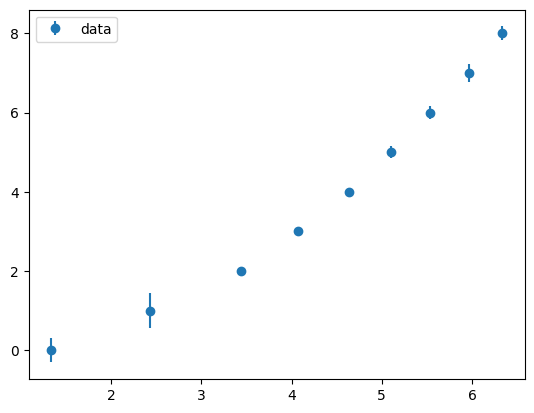

In [4]:
plt.errorbar(r, N, yerr=sigmar, fmt='o', label='data')

fit = Interpolazione(N,r,sigmar,0*np.ones_like(N),raggio_f,guess=[1,1,1],names=['d','δr','L'])
print(fit)

# plt.plot(*fit.draw(),label='fit')
plt.legend()
plt.show()